# Data Cleaning and Exploratory Data Analysis

The dataset was very clean so the data cleaning consists mostly of checks.

First I will import the CSV files for the training and test data.

In [75]:
# importing necessary packages
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
import seaborn as sns
import numpy as np

The train data includes information on the image name, the patient's id, the sex of the patient, the approximate age of the patient, the general anatomic site of the image, the diagnosis, and whether is is benign (no cancer) or malignant (cancer).

In [43]:
# read in attributes
train_data = pd.read_csv('../data/train.csv')
train_data.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0


The test data does not contain the diagnosis or whether the tumor is cancerous or not.

In [44]:
# read in test attributes
test_data = pd.read_csv('../data/test.csv')
test_data.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge
0,ISIC_0052060,IP_3579794,male,70.0,NaN
1,ISIC_0052349,IP_7782715,male,40.0,lower extremity
2,ISIC_0058510,IP_7960270,female,55.0,torso
3,ISIC_0073313,IP_6375035,female,50.0,torso
4,ISIC_0073502,IP_0589375,female,45.0,lower extremity


There are 33,126 samples in the train data and 10,982 samples in the test data.

In [45]:
train_data.shape

(33126, 8)

In [46]:
test_data.shape

(10982, 5)

This is an example of the image from the training data.

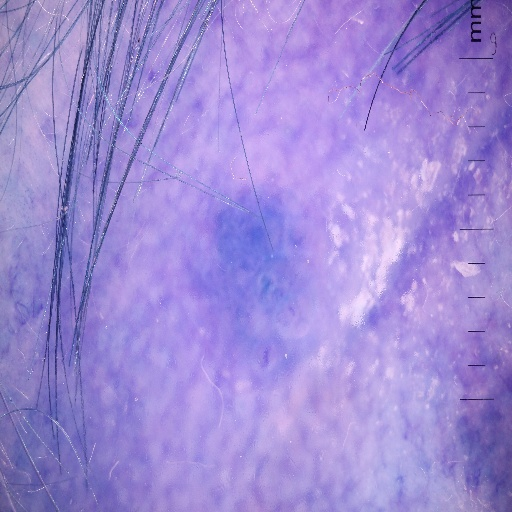

In [47]:
Image('../data/train/' + train_data.iloc[0]['image_name'] + '.JPG') # show the image

The average age of the patients in the training data is roughly 48.87 with a standard deviation of about 14.38. 

In [48]:
train_data.describe() # stats for numerical variables

,age_approx,target
count,33058.000000,33126.000000
mean,48.870016,0.017630
std,14.380360,0.131603
min,0.000000,0.000000
25%,40.000000,0.000000
50%,50.000000,0.000000
75%,60.000000,0.000000
max,90.000000,1.000000


The average age of the patients for the test data is about 49.52 with a standard deivation of about 14.37.

In [49]:
test_data.describe() # stats for numerical variables 

,age_approx
count,10982.000000
mean,49.525587
std,14.370589
min,10.000000
25%,40.000000
50%,50.000000
75%,60.000000
max,90.000000


There are 32,542 benign samples compared to 584 malignant samples in the training data.

In [50]:
cancer_counts = train_data['benign_malignant'].value_counts().reset_index() # get counts by target
cancer_counts.head()

,index,benign_malignant
0,benign,32542
1,malignant,584


The disparity can be shown below. There are many more benign samples than cancerous samples.

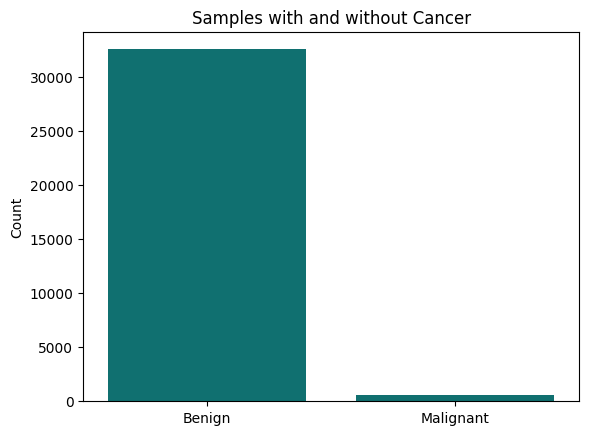

In [51]:
sns.barplot(x=['Benign', 'Malignant'], y=cancer_counts['benign_malignant'], color="teal")
plt.ylabel('Count')
plt.title('Samples with and without Cancer')
plt.show()

In [52]:
train_sex_counts = train_data['sex'].value_counts().reset_index()
train_sex_counts.head()

,index,sex
0,male,17080
1,female,15981


There are slighly more samples from men in the training data.

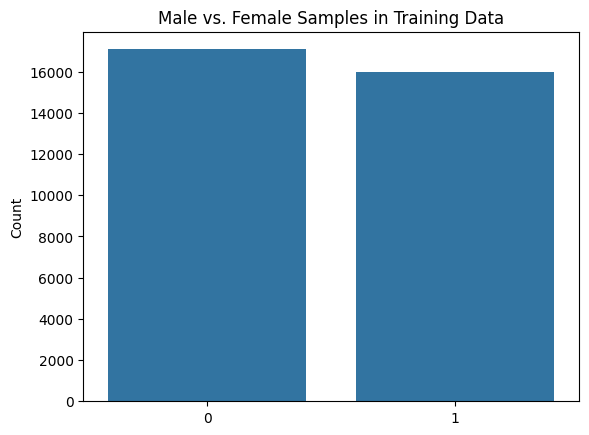

In [53]:
sns.barplot(data=train_sex_counts['sex'])
plt.ylabel('Count')
plt.title('Male vs. Female Samples in Training Data')
plt.show()

In [54]:
test_sex_counts = test_data['sex'].value_counts().reset_index()
test_sex_counts.head()

,index,sex
0,male,6255
1,female,4727


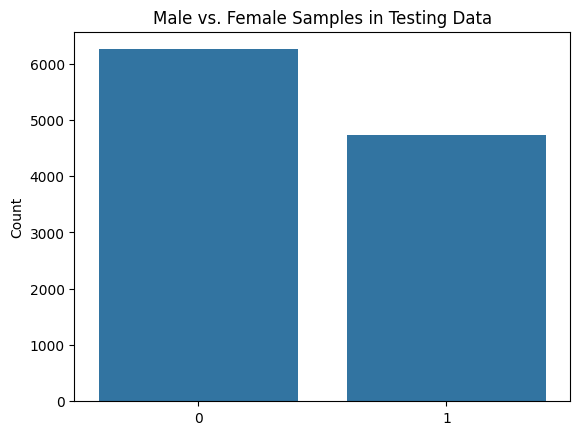

In [55]:
sns.barplot(data=test_sex_counts['sex'])
plt.ylabel('Count')
plt.title('Male vs. Female Samples in Testing Data')
plt.show()

There are also more men in the test data.

In [56]:
train_body_counts = train_data['anatom_site_general_challenge'].value_counts().reset_index()
train_body_counts.head()

,index,anatom_site_general_challenge
0,torso,16845
1,lower extremity,8417
2,upper extremity,4983
3,head/neck,1855
4,palms/soles,375


The average age for patients with melanoma is higher than those without.

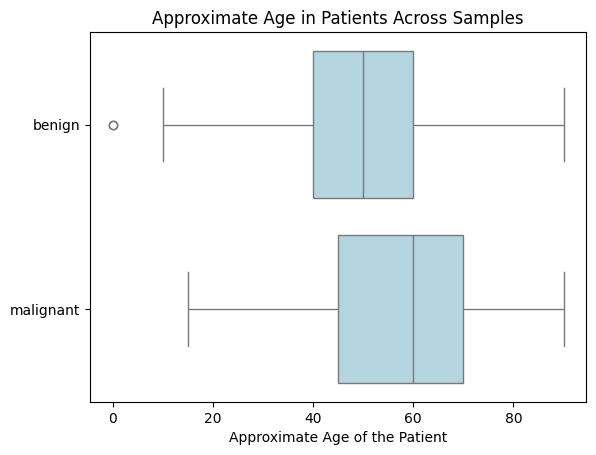

In [57]:
sns.boxplot(data=train_data, x = 'age_approx', y = 'benign_malignant', color='lightblue')
plt.xlabel('Approximate Age of the Patient')
plt.ylabel('')
plt.title('Approximate Age in Patients Across Samples')
plt.show()

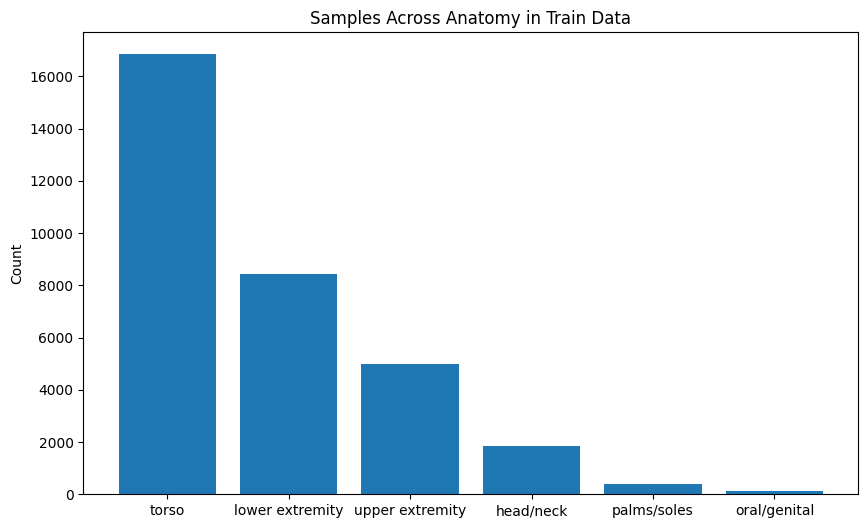

In [58]:
plt.figure(figsize=(10, 6))
plt.bar(train_body_counts['index'], train_body_counts['anatom_site_general_challenge'])
plt.ylabel('Count')
plt.title('Samples Across Anatomy in Train Data')
plt.show()

Most of the training samples are found on the torso, followed by the lower extremity and upper extremity. 

In [59]:
test_body_counts = test_data['anatom_site_general_challenge'].value_counts().reset_index()
test_body_counts.head()

,index,anatom_site_general_challenge
0,torso,5847
1,lower extremity,2501
2,upper extremity,1573
3,head/neck,576
4,palms/soles,108


The testing data looks similar.

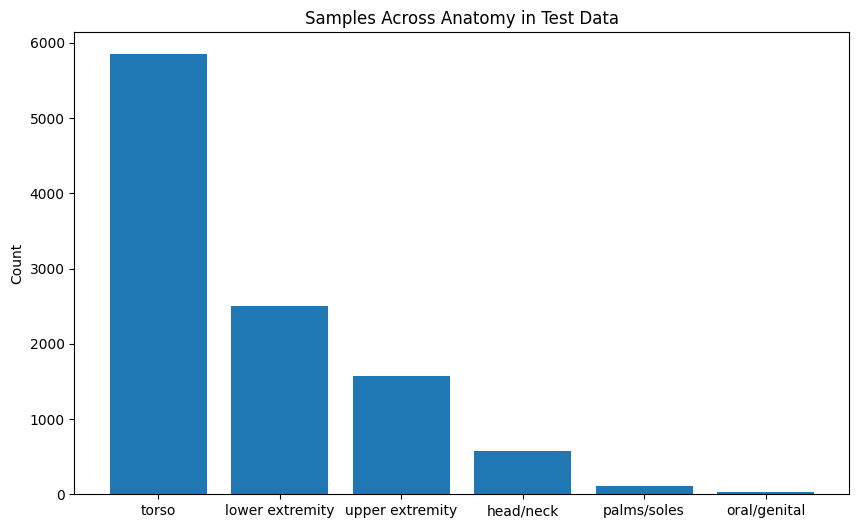

In [60]:
plt.figure(figsize=(10, 6))
plt.bar(test_body_counts['index'], test_body_counts['anatom_site_general_challenge'])
plt.ylabel('Count')
plt.title('Samples Across Anatomy in Test Data')
plt.show()

In [61]:
train_diagnosis_counts = train_data['diagnosis'].value_counts().reset_index()
train_diagnosis_counts.head()

,index,diagnosis
0,unknown,27124
1,nevus,5193
2,melanoma,584
3,seborrheic keratosis,135
4,lentigo NOS,44


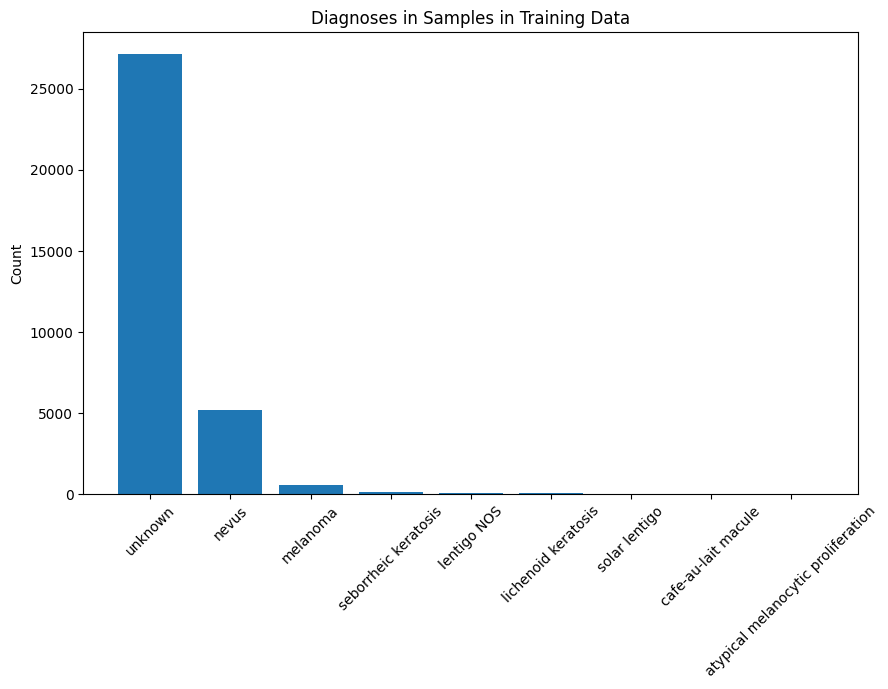

In [62]:
plt.figure(figsize=(10, 6))
plt.bar(train_diagnosis_counts['index'], train_diagnosis_counts['diagnosis'])
plt.ylabel('Count')
plt.title('Diagnoses in Samples in Training Data')
plt.xticks(rotation=45)
plt.show()

Most of the diagnoses in the test data was unknown followed by nevus (moles) and melanoma. 

The null counts are shown below for the samples.

In [63]:
train_data.isnull().sum()

image_name                         0
patient_id                         0
sex                               65
age_approx                        68
anatom_site_general_challenge    527
diagnosis                          0
benign_malignant                   0
target                             0
dtype: int64

In [64]:
test_data.isnull().sum()

image_name                         0
patient_id                         0
sex                                0
age_approx                         0
anatom_site_general_challenge    351
dtype: int64

In [65]:
sex_cancer_counts = train_data.groupby("sex")['benign_malignant'].value_counts().reset_index(name='Count')
sex_cancer_counts.head()

,sex,benign_malignant,Count
0,female,benign,15761
1,female,malignant,220
2,male,benign,16716
3,male,malignant,364


In both cancerous and non-cancerous samples, there are more male samples than female samples.

/var/folders/_8/crn2q8y154j26jm9jc_zpzgw0000gn/T/ipykernel_54601/1794833534.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pivot_df.columns, y=pivot_df.loc['benign'], ax=axes[0], palette=colors)
/var/folders/_8/crn2q8y154j26jm9jc_zpzgw0000gn/T/ipykernel_54601/1794833534.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pivot_df.columns, y=pivot_df.loc['malignant'], ax=axes[1], palette=colors)


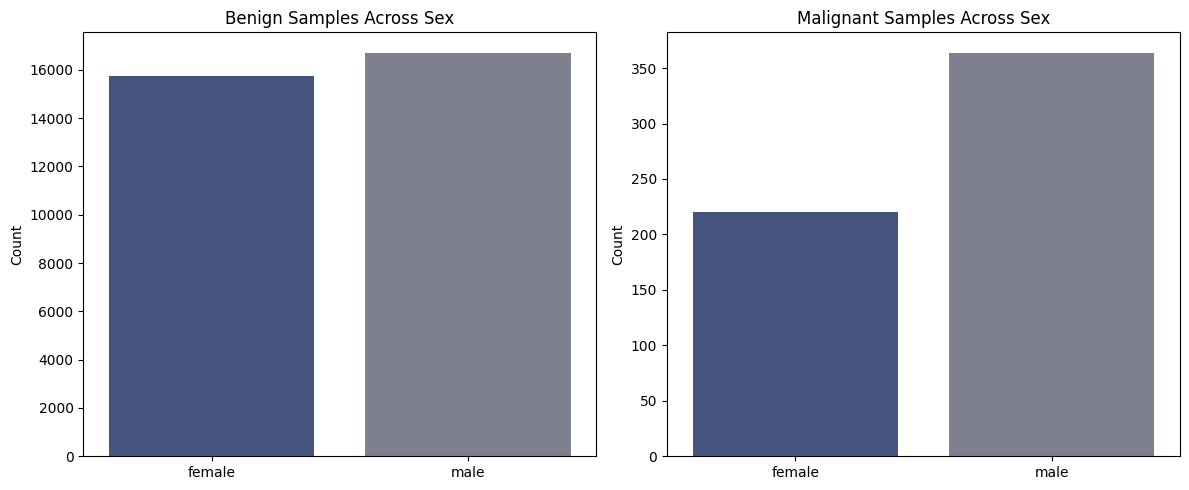

In [66]:
pivot_df = sex_cancer_counts.pivot(index='benign_malignant', columns='sex', values='Count') #counts by sex

colors = ['#3e4f87', '#7b7f8f']  
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(x=pivot_df.columns, y=pivot_df.loc['benign'], ax=axes[0], palette=colors)
axes[0].set_ylabel('Count')
axes[0].set_xlabel('')
axes[0].set_title('Benign Samples Across Sex')

sns.barplot(x=pivot_df.columns, y=pivot_df.loc['malignant'], ax=axes[1], palette=colors)
axes[1].set_ylabel('Count')
axes[1].set_xlabel('')
axes[1].set_title('Malignant Samples Across Sex')

plt.tight_layout()
plt.show()

In [67]:
body_cancer_counts = train_data.groupby("anatom_site_general_challenge")['benign_malignant'].value_counts().reset_index(name='Count')
body_cancer_counts.head()

,anatom_site_general_challenge,benign_malignant,Count
0,head/neck,benign,1781
1,head/neck,malignant,74
2,lower extremity,benign,8293
3,lower extremity,malignant,124
4,oral/genital,benign,120


Most of the benign and most of the cancerous samples are from the torso followed by the lower extremity.

/var/folders/_8/crn2q8y154j26jm9jc_zpzgw0000gn/T/ipykernel_54601/2956250771.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pivot_df.columns, y=pivot_df.loc['benign'], ax=axes[0], palette=colors)
/var/folders/_8/crn2q8y154j26jm9jc_zpzgw0000gn/T/ipykernel_54601/2956250771.py:5: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(x=pivot_df.columns, y=pivot_df.loc['benign'], ax=axes[0], palette=colors)
/var/folders/_8/crn2q8y154j26jm9jc_zpzgw0000gn/T/ipykernel_54601/2956250771.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pivot_df.columns, y=pivot_df.loc['malignant'], ax=axes[1], palette=colors)
/var/folders/_8/crn2q8y154

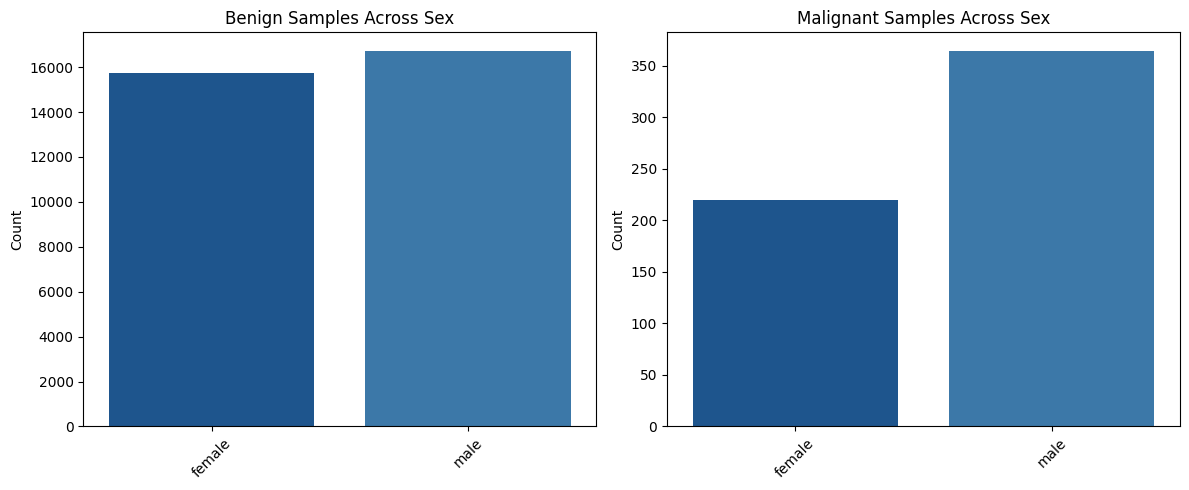

In [68]:
colors = sns.color_palette("Blues_r")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(x=pivot_df.columns, y=pivot_df.loc['benign'], ax=axes[0], palette=colors)
axes[0].set_ylabel('Count')
axes[0].set_xlabel('')
axes[0].set_title('Benign Samples Across Sex')
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(x=pivot_df.columns, y=pivot_df.loc['malignant'], ax=axes[1], palette=colors)
axes[1].set_ylabel('Count')
axes[1].set_xlabel('')
axes[1].set_title('Malignant Samples Across Sex')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [69]:
body_cancer_counts = train_data.groupby("diagnosis")['benign_malignant'].value_counts().reset_index(name='Count')
body_cancer_counts

,diagnosis,benign_malignant,Count
0,atypical melanocytic proliferation,benign,1
1,cafe-au-lait macule,benign,1
2,lentigo NOS,benign,44
3,lichenoid keratosis,benign,37
4,melanoma,malignant,584
5,nevus,benign,5193
6,seborrheic keratosis,benign,135
7,solar lentigo,benign,7
8,unknown,benign,27124


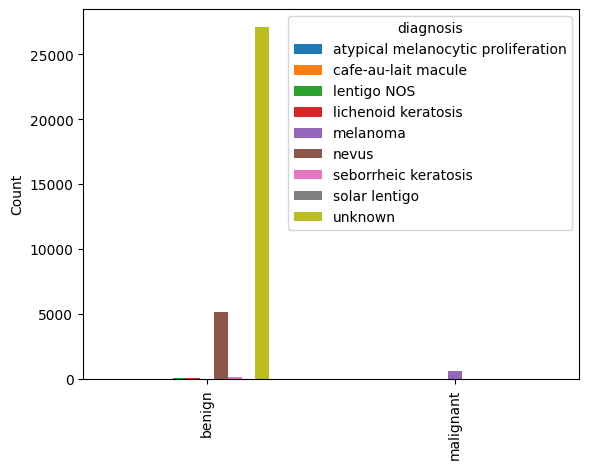

In [70]:
pivot_df = body_cancer_counts.pivot(index='benign_malignant', columns='diagnosis', values='Count')

pivot_df.plot(kind='bar', stacked=False)
plt.ylabel('Count')
plt.xlabel('')
plt.show()

Melanoma is a much more common diagnosis in the cancerous samples and nevus is much more common in the benign samples.

Here is an exploration of the code for image dataset augementation. We can see that the augmented image is flipped horzontally and is over lower quality as it was downsized.

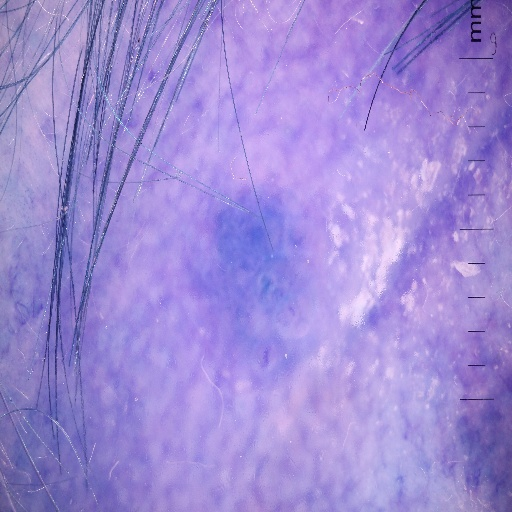

In [72]:
Image('../data/train/' + train_data.iloc[0]['image_name'] + '.JPG')

In [73]:
from PIL import Image
image_path = '../data/train/' + train_data.iloc[0]['image_name'] + '.JPG'

# loading the image
image = Image.open(image_path)

# defining tranformations
data_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.RandomVerticalFlip(), 
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# transforming the image
transformed_image = data_transforms(image)

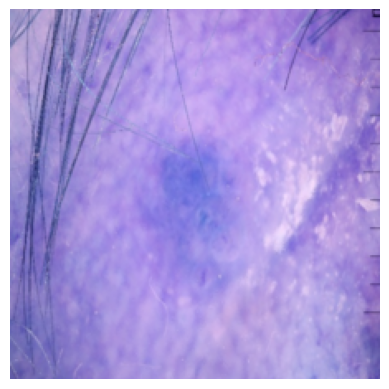

In [74]:
# convert the transformed image tensor back to a numpy array
transformed_image_np = transformed_image.numpy().transpose((1, 2, 0))

# denormalize the image (reverse normalization)
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
transformed_image_np = std * transformed_image_np + mean
transformed_image_np = np.clip(transformed_image_np, 0, 1)  # clip to only get valid pixels

# displaying the image
plt.imshow(transformed_image_np)
plt.axis('off')  # turning off axis laps 
plt.show()